In [0]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2951 - accuracy: 0.9134 - val_loss: 0.1395 - val_accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1385 - accuracy: 0.9586 - val_loss: 0.0979 - val_accuracy: 0.9714
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1056 - accuracy: 0.9686 - val_loss: 0.0846 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0857 - accuracy: 0.9735 - val_loss: 0.0760 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0742 - accuracy: 0.9771 - val_loss: 0.0685 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0647 - accuracy: 0.9795 - val_loss: 0.0741 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0566 - accuracy: 0.9821 - val_loss: 0.0723 - val_accuracy:

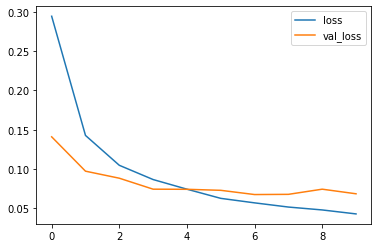

In [0]:
#aparece 1875 porque son batches => 60000 / batch size = 32 => 1875 batches
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

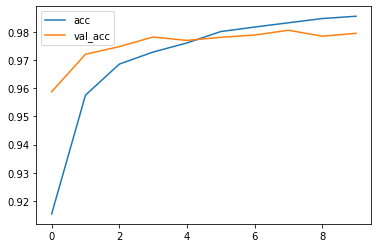

In [0]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9794
[0.06839239597320557, 0.9793999791145325]


Confusion matrix, without normalization
[[ 972    0    2    1    0    1    2    1    1    0]
 [   0 1124    3    1    0    0    2    1    4    0]
 [   1    1 1014    1    1    1    2    7    4    0]
 [   0    0    4  990    0    4    0    6    1    5]
 [   1    0    3    0  962    0    5    0    3    8]
 [   2    0    0    6    1  876    1    1    3    2]
 [   5    2    3    1    2   12  932    0    1    0]
 [   0    3    6    3    0    0    0 1012    2    2]
 [   4    2    1    4    3    4    0    5  948    3]
 [   1    2    0    4    9    0    0    5    3  985]]


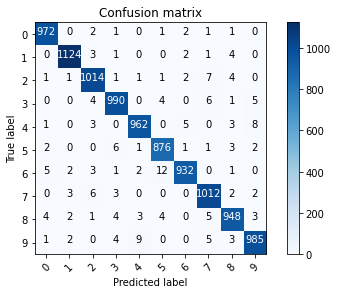

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [1]:
#A ver cuales son los erroers
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

NameError: ignored

In [0]:
#armo otro modelo con mas epochs.
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2923 - accuracy: 0.9152 - val_loss: 0.1395 - val_accuracy: 0.9581
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1399 - accuracy: 0.9586 - val_loss: 0.0977 - val_accuracy: 0.9709
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1054 - accuracy: 0.9675 - val_loss: 0.0789 - val_accuracy: 0.9746
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0868 - accuracy: 0.9736 - val_loss: 0.0782 - val_accuracy: 0.9742
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0735 - accuracy: 0.9767 - val_loss: 0.0716 - val_accuracy: 0.9776
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0639 - accuracy: 0.9792 - val_loss: 0.0676 - val_accuracy: 0.9782
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0565 - accuracy: 0.9819 - val_loss: 0.0693 - val_accuracy:

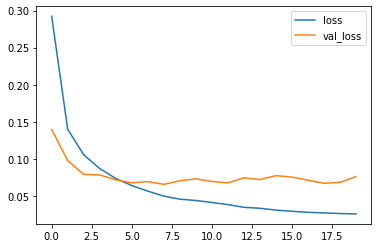

In [0]:
plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['val_loss'], label='val_loss')
plt.legend()

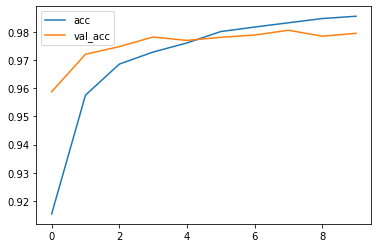

In [0]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
print('Modelo2: ',model2.evaluate(x_test, y_test))
print('Modelo1: ',model.evaluate(x_test, y_test))
#Bajo el costo en el test set pero el accuracy es el mismo.


In [0]:
model.save('MNIST_ANN.h5')

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cd gdrive
model.save('MNIST_ANN.h5')